In [1]:
import quandl, math
import numpy as np
import pandas as pd
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import datetime, time

style.use('ggplot')

/Users/admin/.virtualenvs/ai/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### GOOG stock data dump

In [2]:
df = pd.read_pickle('GOOG.dmp')

In [3]:
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0


df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_col].shift(-forecast_out)

### Dataframe without label column

In [4]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

In [5]:
df.dropna(inplace=True)

### Label column

In [6]:
y = np.array(df['label'])
y

array([  67.73910413,   69.39922877,   68.75223155, ...,  810.06      ,
        802.64      ,  804.06      ])

## Split data for training and testing
Split data for training and testing. 20% of data used for training

In [7]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [8]:
print(y_train)

[ 290.89797418  201.34152199  339.92932927 ...,  193.86093012  274.14626325
  507.45646951]


## Train data

In [9]:
Classifier = LinearRegression(n_jobs=-1)
Classifier.fit(X_train, y_train)

/Users/admin/.virtualenvs/ai/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

## Test classifier

In [10]:
accuracy = Classifier.score(X_test, y_test)
accuracy

0.96646376747412699

## Forecast using X_lately

In [33]:
forecast_set = Classifier.predict(X_lately)

# Initialize forecast column to NaN
df['Forecast'] = np.nan

df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,67.739104,NaN
2004-08-20,54.322689,7.921706,7.227007,22834300.0,69.399229,NaN
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.752232,NaN
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,69.639972,NaN
2004-08-25,53.164113,3.886792,1.183658,9188600.0,69.078238,NaN
2004-08-26,54.122070,3.048837,2.820391,7094800.0,67.839414,NaN
2004-08-27,53.239345,2.760245,-1.803885,6211700.0,68.912727,NaN
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,70.668146,NaN
2004-08-31,51.343492,1.514115,0.048866,4917800.0,71.219849,NaN


In [12]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [32]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

df

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,67.739104,NaN
2004-08-20,54.322689,7.921706,7.227007,22834300.0,69.399229,NaN
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,68.752232,NaN
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,69.639972,NaN
2004-08-25,53.164113,3.886792,1.183658,9188600.0,69.078238,NaN
2004-08-26,54.122070,3.048837,2.820391,7094800.0,67.839414,NaN
2004-08-27,53.239345,2.760245,-1.803885,6211700.0,68.912727,NaN
2004-08-30,51.162935,3.411430,-3.106003,5196700.0,70.668146,NaN
2004-08-31,51.343492,1.514115,0.048866,4917800.0,71.219849,NaN


## Plot Adj. Close and Forecast

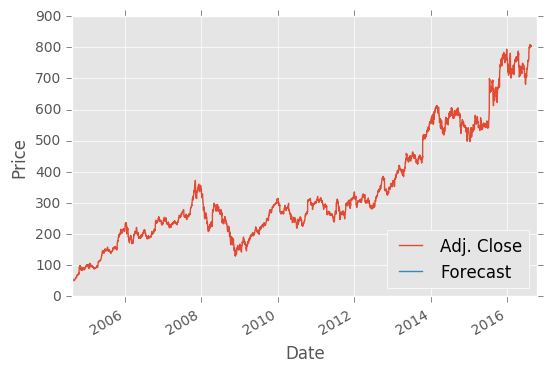

In [34]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')

# Zoom
#plt.axis(xmin=datetime.datetime(2015,1,1), ymin=550,ymax=900)
plt.show()